In [114]:
import pandas as pd
import numpy as np
import os
from textblob import TextBlob
import re
import nltk
import matplotlib.pyplot as plt
#import text_normalizer as tn
import model_evaluation_utils as meu 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#^^^^these need to be saved in directory!

#np.set_printoptions(precision=2, linewidth=80)

pd.options.display.max_colwidth = 200
%matplotlib inline

#which category do you want 
#display on screen 

In [2]:
path = '/Users/Alexandra/Desktop/REPOS/Springboard_DS/CAPSTONE_2/CAP_2/gtd_13to16_0617dist3.csv'

df = pd.read_csv(path, encoding = "ISO-8859-1") #learn for later

/Users/Alexandra/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,20,21,22,23,25,26,27,28,30,32,33,34,36,40,42,44,48,50,51,52,53,54,55,56,57,61,62,63,65,66,67,68,69,70,71,72,74,75,76,77,78,79,80,81,83,85,87,89,91,93,94,95,96,98,99,100,101,102,103,104,105,107,109,110,111,112,113,114,115,116,117,118,119,120,121,122,124,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,303,

In [3]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'Unnamed: 814', 'Unnamed: 815', 'Unnamed: 816', 'Unnamed: 817',
       'Unnamed: 818', 'Unnamed: 819', 'Unnamed: 820', 'Unnamed: 821',
       'Unnamed: 822', 'Unnamed: 823'],
      dtype='object', length=824)

In [4]:
type(df['crit1'])  #figure put which ones are strings

pandas.core.series.Series

In [6]:
pwd

'/Users/Alexandra/Desktop/REPOS/Springboard_DS/CAPSTONE_2/CAP_2'

In [7]:
len(df)

56386

In [8]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,Unnamed: 814,Unnamed: 815,Unnamed: 816,Unnamed: 817,Unnamed: 818,Unnamed: 819,Unnamed: 820,Unnamed: 821,Unnamed: 822,Unnamed: 823
0,2.013010e+11,2013,1,1,NaN,0,NaN,153,Pakistan,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.013010e+11,2013,1,1,NaN,0,NaN,95,Iraq,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.013010e+11,2013,1,1,NaN,0,NaN,95,Iraq,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.013010e+11,2013,1,1,NaN,0,NaN,95,Iraq,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.013010e+11,2013,1,1,NaN,0,NaN,153,Pakistan,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
#doubterr = 0 means there is no doubt so we need to only take these 
len(df[df['doubtterr'] == 0])

27412

we only want to use the data points that are positive in being terror attatcks

now i want to do group by on labels of the gname

In [87]:
len(df[df['gname'] != 'Unknown'])

27808

ok this shows us our training set will be reduced to 13,000

lets check the length of the intersection of known 'gnames' and values of 'doubtterr' = 0 

In [11]:
df_new = df[df['doubtterr'] == 0]

In [12]:
len(df_new)

27412

In [13]:
len(df_new[df_new['gname'] != 'Unknown'])

13840

-----------#--------------------------

In [88]:
df_new = df[df['doubtterr'] == 0]
df_new = df_new[df_new['gname'] != 'Unknown']

In [89]:
len(df_new)

13840

ok this is basically telling us that all of the known 'gnames' have doubtterr value of 0

so now lets perform a groupby sum on the different 'gnames'

In [15]:
len(df_new.groupby('gname'))

460

looks like there are 461 different labels!

In [16]:
df_new['gname'].value_counts()

Islamic State of Iraq and the Levant (ISIL)              2223
Taliban                                                  2113
Boko Haram                                                998
Al-Shabaab                                                769
Maoists                                                   524
Houthi extremists (Ansar Allah)                           465
New People's Army (NPA)                                   356
Kurdistan Workers' Party (PKK)                            338
Fulani extremists                                         304
Al-Qaida in the Arabian Peninsula (AQAP)                  248
Tehrik-i-Taliban Pakistan (TTP)                           231
Revolutionary Armed Forces of Colombia (FARC)             217
Muslim extremists                                         216
Donetsk People's Republic                                 215
Communist Party of India - Maoist (CPI-Maoist)            168
Janjaweed                                                 166
Tripoli 

In [90]:
len(df_new['gname'].value_counts())

460

In [17]:
#df_new.filter(df_new['gname'].value_counts().values != 1)
# SO CONFUSED!

In [91]:
gname_list = list(df_new['gname'].value_counts().index)

#df_new['gname'].value_counts()
num_list = []

for index, item in enumerate(df_new['gname'].value_counts()):
    if item > 30:
        num_list.append(index) #deciding this number?

label_list = gname_list[0:len(num_list)]

In [92]:
value_list = df_new['gname'].value_counts()

In [93]:
group_names = value_list[value_list.values > 30].index

In [132]:
df_2 =  df_new[df_new['gname'].isin(group_names)]

In [133]:
len(df_2) # still pretty large dataset size  , can now put this through test train split

11981

In [134]:
df_2.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,Unnamed: 815,Unnamed: 816,Unnamed: 817,Unnamed: 818,Unnamed: 819,Unnamed: 820,Unnamed: 821,Unnamed: 822,Unnamed: 823,provstate_Label
4,2.013010e+11,2013,1,1,NaN,0,NaN,153,Pakistan,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,477
11,2.013010e+11,2013,1,1,NaN,0,NaN,153,Pakistan,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274
23,2.013010e+11,2013,1,1,NaN,0,NaN,153,Pakistan,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,477
32,2.013010e+11,2013,1,2,NaN,0,NaN,45,Colombia,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110
39,2.013010e+11,2013,1,3,NaN,0,NaN,147,Nigeria,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [135]:
df_2 = df_2.filter(items = ['country_txt', 'region_txt', 'provstate', 'city', 'location', 'suicide', 'attacktype1', 'targtype1_txt', 'targsubtype_txt', 'corp1', 'natlty1_txt', 'gname'])

In [137]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11981 entries, 4 to 56383
Data columns (total 11 columns):
country_txt      11981 non-null object
region_txt       11981 non-null object
provstate        11981 non-null object
city             11981 non-null object
location         4028 non-null object
suicide          11981 non-null object
attacktype1      11981 non-null object
targtype1_txt    11981 non-null object
corp1            11981 non-null object
natlty1_txt      11856 non-null object
gname            11981 non-null object
dtypes: object(11)
memory usage: 1.1+ MB


In [150]:
df_2

,country_txt,region_txt,provstate,city,location,suicide,attacktype1,targtype1_txt,corp1,natlty1_txt,gname
0,Pakistan,South Asia,Sindh,Karachi,The incident occurred in the Orangi Town neighborhood of the city.,0.0,3,Private Citizens & Property,Awami National Party (ANP),Pakistan,Tehrik-i-Taliban Pakistan (TTP)
1,Pakistan,South Asia,Khyber Pakhtunkhwa,Swabi,Sher Afzal Banda area of Swabi district,0.0,2,NGO,Support with Working Solutions (SWWS),Pakistan,Tehrik-i-Taliban Pakistan (TTP)
2,Pakistan,South Asia,Sindh,Karachi,Federal B-Area,0.0,3,Violent Political Party,Muttahida Qaumi Movement (MQM),Pakistan,Tehrik-i-Taliban Pakistan (TTP)
3,Colombia,South America,Cauca,Socorro,NaN,0.0,3,Police,National Police of Colombia,Colombia,Revolutionary Armed Forces of Colombia (FARC)
4,Nigeria,Sub-Saharan Africa,Adamawa,Song,Police Station In Song,0.0,2,Police,Adamawa State Police,Nigeria,Boko Haram
5,Nigeria,Sub-Saharan Africa,Adamawa,Song,Local Government secretariat building,0.0,7,Government (General),Government of Song,Nigeria,Boko Haram
6,Philippines,Southeast Asia,Albay,Ligao,The incident occurred in the Oma Oma village near the city.,0.0,2,Military,Armed Forces of the Philippines (AFP),Philippines,New People's Army (NPA)
7,Turkey,Middle East & North Africa,Sirnak,Cizre,The incident occurred in Cudi neighborhood of city.,0.0,3,Educational Institution,Unknown,Turkey,Kurdistan Workers' Party (PKK)
8,Afghanistan,South Asia,Ghor,Unknown,Occurred In Western Area Of Province,0.0,3,Police,Afghan Police,Afghanistan,Taliban
9,Somalia,Sub-Saharan Africa,Lower Shebelle,Merca,NaN,0.0,3,Military,African Union Mission in Somalia (AMISOM),International,Al-Shabaab


In [149]:
#resetindex
df_2 = df_2.reset_index(drop = True)

In [ ]:
#there were only really 

In [139]:
df_2.columns

Index(['country_txt', 'region_txt', 'provstate', 'city', 'location', 'suicide',
       'attacktype1', 'targtype1_txt', 'corp1', 'natlty1_txt', 'gname'],
      dtype='object')

In [141]:
cat_List = ['country_txt', 'region_txt', 'provstate', 'city', 'suicide',
       'attacktype1', 'targtype1_txt', 'corp1']

In [142]:
for col in cat_List:
    df_2[col] = df_2[col].astype('category')

In [143]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11981 entries, 4 to 56383
Data columns (total 11 columns):
country_txt      11981 non-null category
region_txt       11981 non-null category
provstate        11981 non-null category
city             11981 non-null category
location         4028 non-null object
suicide          11981 non-null category
attacktype1      11981 non-null category
targtype1_txt    11981 non-null category
corp1            11981 non-null category
natlty1_txt      11856 non-null object
gname            11981 non-null object
dtypes: category(8), object(3)
memory usage: 830.8+ KB


In [146]:
cat_columns = df_2.select_dtypes(['category']).columns

In [147]:
cat_columns

Index(['country_txt', 'region_txt', 'provstate', 'city', 'suicide',
       'attacktype1', 'targtype1_txt', 'corp1'],
      dtype='object')

In [148]:
#convert these to numbers
df_2[cat_columns].apply(lambda x: x.cat.codes)

,country_txt,region_txt,provstate,city,suicide,attacktype1,targtype1_txt,corp1
4,39,7,350,2134,0,2,12,373
11,39,7,205,4067,0,1,9,2668
23,39,7,350,2134,0,2,20,2035
32,13,6,88,3980,0,2,11,2079
39,38,9,5,3991,0,1,11,26
40,38,9,5,3991,0,6,5,1302
42,41,8,19,2618,0,1,8,331
43,52,4,351,1012,0,2,2,2884
44,0,7,145,4392,0,2,11,75
46,44,9,228,2923,0,2,8,83


In [ ]:
#now feed into decision tree classifier, random forest

y = np.array(df_ultra_mega_frame['price_eth'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df_ultra_mega_frame.drop(['price_eth','date','rise_lower'], axis = 1) #'pos_count','neg_count' 
# Saving feature names for later use
feature_list = list(features.columns) #this way we remeber the column names
# Convert to numpy array
X = np.array(features) #because once we convert to np array it drops the names

In [ ]:
#for logistic regression, svm
gen_onehot_features = pd.get_dummies(poke_df['Generation'])
pd.concat([poke_df[['Name', 'Generation']], gen_onehot_features], 
           axis=1).iloc[4:10]

# label encoding vs one hot encoding for lr vs decision tree

In [124]:
#day since event

#hot enconding country region province and city

#location is hard to encode, possibly bag of words location, creating the 
#suicide binary
#attatck type, make it character ---> then hot encoding 
#targtype ---> hot encode
#corp1 --> hot encoded 

# need to make a list that will convert number into letters.
#
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# transform and map pokemon generations
country_le = LabelEncoder()
country_labels = country_le.fit_transform(df_2['country_txt'])
df_2['country_txt_labels'] = country_labels

# transform and map pokemon legendary status
prov_le = LabelEncoder()
prov_labels = prov_le.fit_transform(df_2['provstate'])
df_2['provstate_Label'] = prov_labels


df_2_sub = df_2[['country_txt', 'country_txt_labels', 'provstate',  
                     'provstate_Label']]

df_2_sub.iloc[4:10]


,country_txt,country_txt_labels,provstate,provstate_Label
39,Nigeria,38,Adamawa,5
40,Nigeria,38,Adamawa,5
42,Philippines,41,Albay,19
43,Turkey,52,Sirnak,351
44,Afghanistan,0,Ghor,145
46,Somalia,44,Lower Shebelle,228


In [131]:
df_2_sub

,country_txt,country_txt_labels,provstate,provstate_Label
4,Pakistan,39,Sindh,350
11,Pakistan,39,Khyber Pakhtunkhwa,205
23,Pakistan,39,Sindh,350
32,Colombia,13,Cauca,88
39,Nigeria,38,Adamawa,5
40,Nigeria,38,Adamawa,5
42,Philippines,41,Albay,19
43,Turkey,52,Sirnak,351
44,Afghanistan,0,Ghor,145
46,Somalia,44,Lower Shebelle,228


In [ ]:
df_2_sub

In [128]:
# encode country labels using one-hot encoding scheme
country_ohe = OneHotEncoder()
country_feature_arr = country_ohe.fit_transform(
                              df_2[['country_txt_labels']]).toarray()
country_feature_labels = list(country_le.classes_)
country_features = pd.DataFrame(country_feature_arr, 
                            columns=country_feature_labels)
# encode legendary status labels using one-hot encoding scheme
prov_ohe = OneHotEncoder()
prov_feature_arr = prov_ohe.fit_transform(
                                df_2[['provstate_Label']]).toarray()

prov_feature_labels = ['prov_'+str(cls_label) 
                           for cls_label in prov_le.classes_]
prov_features = pd.DataFrame(prov_feature_arr, 
                            columns=prov_feature_labels)

In [129]:
df_new_ohe = pd.concat([df_2_sub, country_features, prov_features], axis=1)
columns = sum([['country_txt', 'country_txt_labels'],   
               country_feature_labels, ['provstate', 'provstate_Label'], 
               prov_feature_labels], [])

df_new_ohe[columns].iloc[4:10]

,country_txt,country_txt_labels,Afghanistan,Algeria,Australia,Bahrain,Bangladesh,Belgium,Bosnia-Herzegovina,Burkina Faso,...,prov_Yala,prov_Yangon,prov_Yobe,prov_Yogyakarta,prov_Zabul,prov_Zamboanga Sibugay,prov_Zamboanga del Norte,prov_Zamboanga del Sur,prov_Zamfara,prov_Zawiya
4,Pakistan,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
len(df_new_ohe)

23190

why are these NaN's ???

In [ ]:
2

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# transform and map pokemon generations
gen_le = LabelEncoder()
gen_labels = gen_le.fit_transform(poke_df['Generation'])
poke_df['Gen_Label'] = gen_labels

In [110]:
len(df_2.columns)

15

In [111]:
y = np.array(df_2['gname'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df_2.drop(['gname'], axis = 1) #'pos_count','neg_count' 
# Saving feature names for later use
feature_list = list(features.columns) #this way we remeber the column names
# Convert to numpy array
X = np.array(features) #because once we convert to np array it drops the names

#### now test train split

In [112]:
train_features, test_features, train_target, test_target = train_test_split(X, y, test_size = 0.25, random_state = 42)

random forest 

In [116]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(train_features, train_target)

ValueError: could not convert string to float: 'Afghanistan'

# extra stuff

In [32]:
df_new.index = [i for i in range(0,len(df_new))]

In [34]:
#ok to make summary something, I will filter 

summarydate_list = []
body_list = []

for i in range(0,len(df_new)):
    s = df_new['summary'][i]
    summarydate_list.append(s[:s.find(':')])
    body_list.append(s[s.find(':'):])

df_new['summarydate'] = summarydate_list
df_new['body'] = body_list

In [35]:
# test train split!!!

In [37]:
train_summaries, test_summaries, train_labels, test_labels = train_test_split(df_new['body'],df_new['gname'], test_size = 0.3, random_state = 2)

In [38]:
len(train_summaries)

9688

In [39]:
#separate labels from feature set. here its gname.
#if i decide to use 50 labels, go for classification !!!
#have built supervised model, on predicting which have suffienct amount of data to train on, in the end about 50 labels
# under the assumtion our test data is done by one of these groups, then we can classify it with *___* accuracy.
# 50 catergories is tough problem already


In [40]:
#df_new.groupby('gname').filter(lambda x: x)

In [41]:
#df_new['body'] = [string.replace(":", " ") for string in df_new['body']]

In [42]:
len(label_list)

50

filtering these 1's'

ok we got our labels now 


chosen Structured Data Features

In [43]:
#df_2.filter(['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city', 'location', 'suicide', 'attacktype1', 'targtype1_txt', 'targsubtype_txt', 'corp1', 'natlty1_txt'])

In [44]:
len(df_2.columns)

824

we reduce to 14 features of structured data... I still want to filter the 1's !!

now we will look into the analysis of the 'summary'

## Summary word vectorization, tfidf, svm

In [84]:
train_summaries

9856     : A suicide bomber detonated an explosives-laden vehicle in Akad area, 9 Nissan neighborhood, Sadr City, Baghdad city, Baghdad governorate, Iraq. In addition to the bomber, at least 8 people were ...
12714    : Sometime between September 18, 2016 and September 24, 2016, assailants detonated an explosive device at a civilian house in Dawr, Saladin, Iraq. There were no reported casualties resulting from ...
2427     : Assailants abducted 153 Kurdish children near Aleppo city, Aleppo governorate, Syria. At least 148 hostages were released between June and October, 2014. An additional five hostages escaped on a...
11       : Assailants opened fire on a Citizens Armed Forces Geographical Unit (CAFGU) member at a terminal in Magpet city, North Cotabato province, Philippines. The victim, who had recently been hired to ...
12993    : Assailants fired rockets that landed and detonated in Al Mocambo neighborhood, Aleppo, Syria. This was one of three projectile attacks in different neigh

In [46]:
#df_new = df_new['summary']

In [47]:
#df_2 = df_2[df_2['doubtterr'] == 0]
#df_2 = df_2[df_2['gname'] != 'Unknown']

#ok to make summary something, I will filter 

summarydate_list = []
body_list = []

for i in range(0,len(df_new)):
    s = df_new['summary'][i]
    summarydate_list.append(s[:s.find(':')])
    body_list.append(s[s.find(':'):])

df_new['summarydate'] = summarydate_list
df_new['body'] = body_list

some data cleaning

# LOOKING AT SUMMARIES

## naive bayes

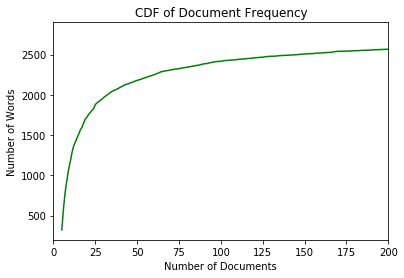

In [48]:
# Your turn.  LATER!! OK I FORGOT WHAT THIS CELL WILL DO 

#if a word shows up in 80 percent of document max_df = 0.8
#max defaullt = 100 percent, difference between float or integer
#v5 percent of docs vs less thahn 5 documents

# Ploting CDF of the number of words appear in x(i) documents

# Puting bag-of-words into numpy array



from sklearn.feature_extraction.text import CountVectorizer

text = train_summaries
#print("Original text is\n{}".format('\n'.join(text)))

vectorizer = CountVectorizer(min_df=5) #mindf 0 vs mindf 5

#initilze the object first
#then you feed it your data

# call `fit` to build the vocabulary
vectorizer.fit(text) #train it almost to create your vocab.

#---

X = vectorizer.fit_transform(train_summaries)
X = X.toarray()

# Get the counts of documents each word appears on 
count = []
for i in range(X.shape[1]):
    x = np.count_nonzero(X[:, i])
    count.append(x)
count = np.sort(count)

# Constructing X and Y axis
ind = [] #number of words
val = [] #number of documents
for i in np.arange(len(count)):
    if i != len(count)-1:
        if count[i] < count[i+1]:
            ind.append(i+1)
            val.append(count[i])
    else:
        ind.append(len(count))
        val.append(count[i])

# Plot the graph
plt.plot(val, ind, color='green')
plt.xlabel('Number of Documents')
plt.ylabel('Number of Words')
plt.title('CDF of Document Frequency')
plt.xlim(0, 200)
plt.show()

#min_df 
#looking at 4 reviews, will be adding words
#once you start to get into hundreds of reviews
#so the amount of extra words 
#once you hit 22500 then dont add to dictionary
#if you make mindf too small then it will care about words that 
#only exist in 1 document
#df min should be within percentage of df max??
#10 and 250


#   THIS CELL IS OBTAINING MIN DF


In [49]:
from sklearn.feature_extraction.text import CountVectorizer

text = train_summaries
#print("Original text is\n{}".format('\n'.join(text)))

vectorizer = CountVectorizer(min_df=5) #mindf 0 vs mindf 5

#initilze the object first
#then you feed it your data

# call `fit` to build the vocabulary
vectorizer.fit(text) #train it almost to create your vocab.

# call `transform` to convert text to a bag of words

x = vectorizer.transform(text) #using that vocabulary to transform this document into vectors
#2d array
#3vectors with 4 dimensions


#Bag of words give you , takes on order of vocabulary list.

#now you have 4 dimensions
#transforms document into a 4 dimensional array
# x is same length as cvocabulary
#vocabulary is ordered alaphabetically not ordered by the text.

#sparse array... to and from the zeroes?

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array

#x = x.toarray()#makes #REMEMEBR THESE ARE FEATURES

#print("")
#print("Transformed text vector is \n{}".format(x))

# `get_feature_names` tracks which word is associated with each column of the transformed x
print("")
print("Words for each feature:")
print(vectorizer.get_feature_names()[:50])

# Notice that the bag of words treatment doesn't preserve information about the *order* of words, 
# just their frequency


Words for each feature:
['000', '02', '10', '100', '101', '107', '10th', '11', '12', '120', '13', '130', '14', '15', '150', '16', '16th', '17', '177', '18', '19', '190', '20', '200', '2000', '2013', '2014', '2015', '2016', '2017', '21', '22', '23', '24', '25', '26', '27', '270', '28', '29', '30', '300', '31', '32', '33', '34', '35', '350', '36', '37']


I probably want to get rid of the numbers

In [50]:
x.shape #number of words

(9688, 2778)

# TRAINING A MODEL WITH SUMMARIES, and some complications

### test train split:

In [51]:
group_names = [str(item) for item in list(df_new['gname'])]
#le = LabelEncoder() 
#group_labels = le.fit_transform(group_names) 
#group_labels

In [69]:
df_new['body'] = [string.replace(":", " ") for string in df_new['body']]

In [70]:
#test train split on norm_corpus 

train_summary, test_summary, train_labels, test_labels = train_test_split(df_new['body'],group_names, test_size = 0.3, random_state = 2)

print(len(train_summary),len(train_labels))

print(len(test_summary),len(test_labels))

# build train and test datasets
#train_articles = df['body'][:1000]
#train_labels = df['category'][:1000]
#test_articles = df['body'][1000:]
#test_labels = df['category'][1000:]

# normalize datasets
#norm_train_reviews = tn.normalize_corpus(train_reviews)
#norm_test_reviews = tn.normalize_corpus(test_reviews)

#label_list

9688 9688
4152 4152


label_list.head()

In [81]:
train_summary[7907]

'  Assailants opened fire on a police headquarters in Greshk district, Helmand province, Afghanistan. Two police officers and one assailant were killed and one officer was wounded in the attack. The Taliban claimed responsibility for the incident.'

In [82]:
train_summary[4615]

'  A suicide bomber detonated an explosive device targeting an Afghan army patrol outside of a medical clinic in Shinwar district, Nangarhar province, Afghanistan. In addition to the bomber, two civilians were killed and at least six others were injured in the blast. The Taliban claimed responsibility for the incident.'

In [83]:
train_summary[9856]

'  A suicide bomber detonated an explosives-laden vehicle in Akad area, 9 Nissan neighborhood, Sadr City, Baghdad city, Baghdad governorate, Iraq. In addition to the bomber, at least 8 people were killed and 20 people were injured in the blast. The Islamic State of Iraq and the Levant (ISIL) claimed responsibility for the attack.'

In [77]:
train_summary #remove slash?

9856       A suicide bomber detonated an explosives-laden vehicle in Akad area, 9 Nissan neighborhood, Sadr City, Baghdad city, Baghdad governorate, Iraq. In addition to the bomber, at least 8 people were ...
12714      Sometime between September 18, 2016 and September 24, 2016, assailants detonated an explosive device at a civilian house in Dawr, Saladin, Iraq. There were no reported casualties resulting from ...
2427       Assailants abducted 153 Kurdish children near Aleppo city, Aleppo governorate, Syria. At least 148 hostages were released between June and October, 2014. An additional five hostages escaped on a...
11         Assailants opened fire on a Citizens Armed Forces Geographical Unit (CAFGU) member at a terminal in Magpet city, North Cotabato province, Philippines. The victim, who had recently been hired to ...
12993      Assailants fired rockets that landed and detonated in Al Mocambo neighborhood, Aleppo, Syria. This was one of three projectile attacks in different neigh

In [55]:
# from something else
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
# our pipeline is ready

In [56]:
norm_train_summary = normalize_corpus(train_summary)
norm_test_summary = normalize_corpus(test_summary)

In [57]:
len(norm_train_summary), len(train_labels)

(9688, 9688)

In [58]:
# from something else 
# well this is tge entire array corpus not split up
#corpus = df['body']
#norm_corpus = normalize_corpus(corpus)
#norm_corpus 

### bag of words features and tfidf features

In [59]:
# from dj book
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
# expirementwith min df and max df values and ngram range ngram_range=(1,2) # single words and bigrams!

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,1))
cv_train_features = cv.fit_transform(norm_train_summary)


# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,1),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_summary)

In [60]:
# from dj book
# transform test reviews into features
cv_test_features = cv.transform(norm_test_summary)
tv_test_features = tv.transform(norm_test_summary)

In [61]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (9688, 14268)  Test features shape: (4152, 14268)
TFIDF model:> Train features shape: (9688, 14268)  Test features shape: (4152, 14268)


In [62]:
#now train model on cv/tv_train, and then predict on those 
#lr.fit on tv train (labels second argument) and on cv train
#lr.fit, svm.fit, dtree.fit, rf.fit, gradientboost.fit

In [63]:
len(norm_train_summary), cv_train_features.shape, len(train_labels)

(9688, (9688, 14268), 9688)

##### model training

### Logistic regression analysis

In [64]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', n_iter=100)

OK what is the problem wth below??

In [65]:
# Logistic Regression model on BOW features
lr_bow_predictions = meu.train_predict_model(classifier=lr, 
                                             train_features=cv_train_features, train_labels=train_labels,
                                             test_features=cv_test_features, test_labels=test_labels)

meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=lr_bow_predictions,
                                      classes=label_list) #they have to match category labels

Model Performance metrics:
------------------------------
Accuracy: 0.947
Precision: 0.9205
Recall: 0.947
F1 Score: 0.9309

Model Classification report:
------------------------------
                                                precision    recall  f1-score   support

   Islamic State of Iraq and the Levant (ISIL)       0.98      1.00      0.99       637
                                       Taliban       0.99      1.00      1.00       643
                                    Boko Haram       0.99      1.00      1.00       312
                                    Al-Shabaab       0.96      1.00      0.98       230
                                       Maoists       0.95      1.00      0.97       171
               Houthi extremists (Ansar Allah)       0.95      1.00      0.98       137
                       New People's Army (NPA)       0.97      1.00      0.98       111
                Kurdistan Workers' Party (PKK)       0.98      1.00      0.99       107
                       

/Users/Alexandra/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Alexandra/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/Alexandra/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Alexandra/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [66]:
lr.fit(cv_train_features, train_labels)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
lr.score(cv_test_features, test_labels)

0.94701348747591518

In [68]:
predictions = lr.predict(cv_test_features)

In [384]:
predictions

array(['Al-Qaida in the Arabian Peninsula (AQAP)',
       'Barqa Province of the Islamic State',
       'Islamic State of Iraq and the Levant (ISIL)', ...,
       'Al-Qaida in the Arabian Peninsula (AQAP)', 'Maoists',
       'Al-Naqshabandiya Army'], dtype=object)

#### SVM analysis

In [385]:
svm_tfidf_predictions = meu.train_predict_model(classifier=svm, 
                                                train_features=cv_train_features, train_labels=train_labels,
                                             test_features=cv_test_features, test_labels=test_labels)

meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=svm_tfidf_predictions,
                                      classes=label_list)

/Users/Alexandra/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Model Performance metrics:
------------------------------
Accuracy: 0.9583
Precision: 0.9443
Recall: 0.9583
F1 Score: 0.9488

Model Classification report:
------------------------------
                                                precision    recall  f1-score   support

   Islamic State of Iraq and the Levant (ISIL)       0.98      0.99      0.99       637
                                       Taliban       1.00      1.00      1.00       643
                                    Boko Haram       0.98      0.99      0.99       312
                                    Al-Shabaab       0.98      1.00      0.99       230
                                       Maoists       0.99      1.00      1.00       171
               Houthi extremists (Ansar Allah)       0.99      1.00      0.99       137
                       New People's Army (NPA)       0.98      1.00      0.99       111
                Kurdistan Workers' Party (PKK)       0.99      1.00      1.00       107
                     

/Users/Alexandra/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Alexandra/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/Alexandra/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Alexandra/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


looks like svm improved for bussiness but not for anything else 

# now other vectors 

In [386]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
# our pipeline is ready

In [390]:
corpus = df_new['body']
norm_corpus = normalize_corpus(corpus)
norm_corpus 

array([ 'explosive device discovered near private residence awami national party anp activist orangi town sindh province pakistan device safely defused without causing injury group claimed responsibility unsuccessful attack however officials attribute incident tehrikitaliban pakistan ttp',
       'assailants opened fire vehicle carrying charity workers sher afzal banda area swabi district khyber pakhtunkhwa province pakistan workers support working solutions swws organization providing medical education services seven people killed attack one person injured group claimed responsibility incident however officials suspect tehrikitaliban pakistan ttp involved',
       'explosives attached motorcycle detonated near muttahida qaumi movement mqm political rally karachi city sindh state pakistan bombing targeting buses transporting mqm activists four people killed another injured several vehicles damaged hakeemullah mehsud group subgroup tehrikitaliban pakistan ttp claimed responsibility inci

In [391]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [393]:
df_new['vectors'] = cv_matrix.tolist()

In [394]:
df_new

,summarydate,body,gname,vectors
0,01/01/2013,"An explosive device was discovered near the private residence of an Awami National Party (ANP) activist in Orangi Town, Sindh province, Pakistan. The device was safely defused without causing in...",Tehrik-i-Taliban Pakistan (TTP),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,01/01/2013,"Assailants opened fire on a vehicle carrying charity workers in the Sher Afzal Banda area of Swabi district, Khyber Pakhtunkhwa province, Pakistan. The workers, from the Support with Working Sol...",Tehrik-i-Taliban Pakistan (TTP),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,01/01/2013,"Explosives attached to a motorcycle detonated near a Muttahida Qaumi Movement (MQM) political rally in Karachi city, Sindh state, Pakistan. The bombing was targeting buses transporting MQM activ...",Tehrik-i-Taliban Pakistan (TTP),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,01/02/2013,"An explosives-laden vehicle was discovered in Socorro town, Cauca department, Colombia. The device, targeting civilians and police, was safely defused without causing injury. Officials attribute...",Revolutionary Armed Forces of Colombia (FARC),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,01/03/2013,"Approximately 100 assailants attacked a police station with machine guns and grenades in Song town, Adamawa state, Nigeria. Four people were killed in the ensuing shootout, including a police of...",Boko Haram,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,01/03/2013,"Approximately 100 assailants attacked a local secretariat building in Song town, Adamawa state, Nigeria. There were no reported casualties resulting from the attack, although the building was se...",Boko Haram,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,01/02/2013,"Assailants ambushed a militia member and his wife in Ligao city, Albay province, Bicol region, Philippines. The militia member was not hurt in the attack, but his wife was killed. No group claim...",New People's Army (NPA),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,01/02/2013,"A percussion device detonated on the third floor of a high school in Cizre city, Sirnak province, Turkey. Three students were injured in the blast. No group claimed responsibility for the incide...",Kurdistan Workers' Party (PKK),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,01/02/2013,"Assailants planted a hand grenade at the private residence of a district police chief in Ghor province, Afghanistan. Colonel Akhtar Mohammad Ghalmini and five other family members were injured i...",Taliban,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,01/0

In [395]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,aa,aab,aadan,aadhar,aadmi,aafia,aah,aam,aamtala,aandolan,...,zunheboto,zunuj,zurmat,zuruq,zusammenarbeit,zuwarah,zuweid,zuwetina,zvezda,zwakah
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [396]:
# the matrix of the tfidf.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
np.round(tv_matrix, 2)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [397]:
df_new['tfidf_vector'] = np.round(tv_matrix, 2).tolist()

In [398]:
df_new

,summarydate,body,gname,vectors,tfidf_vector
0,01/01/2013,"An explosive device was discovered near the private residence of an Awami National Party (ANP) activist in Orangi Town, Sindh province, Pakistan. The device was safely defused without causing in...",Tehrik-i-Taliban Pakistan (TTP),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,01/01/2013,"Assailants opened fire on a vehicle carrying charity workers in the Sher Afzal Banda area of Swabi district, Khyber Pakhtunkhwa province, Pakistan. The workers, from the Support with Working Sol...",Tehrik-i-Taliban Pakistan (TTP),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,01/01/2013,"Explosives attached to a motorcycle detonated near a Muttahida Qaumi Movement (MQM) political rally in Karachi city, Sindh state, Pakistan. The bombing was targeting buses transporting MQM activ...",Tehrik-i-Taliban Pakistan (TTP),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,01/02/2013,"An explosives-laden vehicle was discovered in Socorro town, Cauca department, Colombia. The device, targeting civilians and police, was safely defused without causing injury. Officials attribute...",Revolutionary Armed Forces of Colombia (FARC),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,01/03/2013,"Approximately 100 assailants attacked a police station with machine guns and grenades in Song town, Adamawa state, Nigeria. Four people were killed in the ensuing shootout, including a police of...",Boko Haram,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,01/03/2013,"Approximately 100 assailants attacked a local secretariat building in Song town, Adamawa state, Nigeria. There were no reported casualties resulting from the attack, although the building was se...",Boko Haram,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,01/02/2013,"Assailants ambushed a militia member and his wife in Ligao city, Albay prov

In [399]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,13830,13831,13832,13833,13834,13835,13836,13837,13838,13839
0,1.000000,0.130449,0.143599,0.423876,0.017184,0.023133,0.015869,0.078460,0.138516,0.048599,...,0.008085,0.007651,0.064685,0.010909,0.074057,0.022866,0.002831,0.002831,0.057135,0.013598
1,0.130449,1.000000,0.093375,0.030932,0.070194,0.067392,0.055188,0.093164,0.025305,0.037932,...,0.030476,0.028842,0.051981,0.028027,0.013804,0.029958,0.041306,0.041306,0.024094,0.012876
2,0.143599,0.093375,1.000000,0.014814,0.030667,0.008092,0.011991,0.020691,0.009048,0.013402,...,0.012907,0.012215,0.051020,0.027169,0.008269,0.038024,0.038193,0.038193,0.084000,0.006440
3,0.423876,0.030932,0.014814,1.000000,0.046991,0.014708,0.002202,0.040225,0.071280,0.024422,...,0.019286,0.018252,0.090420,0.000000,0.002440,0.002224,0.000000,0.000000,0.030150,0.037948
4,0.017184,0.070194,0.030667,0.046991,1.000000,0.538049,0.061466,0.035089,0.040467,0.057961,...,0.174745,0.165376,0.157935,0.063987,0.016851,0.068888,0.082829,0.082829,0.033645,0.046641
5,0.023133,0.067392,0.008092,0.014708,0.538049,1.000000,0.072448,0.034879,0.016922,0.065224,...,0.081625,0.077249,0.047793,0.032615,0.019060,0.074654,0.036775,0.036775,0.011435,0.042243
6,0.015869,0.055188,0.011991,0.002202,0.061466,0.072448,1.000000,0.044564,0.018333,0.059845,...,0.019815,0.018752,0.034795,0.192010,0.074689,0.015115,0.013742,0.013742,0.009187,0.035431
7,0.078460,0.093164,0.020691,0.040225,0.035089,0.034879,0.044564,1.000000,0.031775,0.042506,...,0.028807,0.027263,0.073269,0.009117,0.010423,0.015456,0.026623,0.026623,0.043253,0.012108
8,0.138516,0.025305,0.009048,0.071280,0.040467,0.016922,0.018333,0.031775,1.000000,0.018155,...,0.068680,0.064998,0.075835,0.015497,0.013541,0.012622,0.011123,0.011123,0.119868,0.015729
9,0.048599,0.037932,0.013402,0.024422,0.057961,0.065224,0.059845,0.042506,0.018155,1.000000,...,0.031701,0.030001,0.067503,0.041930,0.013575,0.020718,0.018075,0.018075,0.039901,0.015768


In [400]:
similarity_array = np.array(similarity_df)

In [401]:
similarity_list = similarity_array.tolist()

In [405]:
df_new['cosine_sim'] = similarity_list

In [406]:
df_new['cosine_sim']

0        [1.0000000000000002, 0.13044949540012843, 0.1435988748662329, 0.42387551605114177, 0.017183898637564664, 0.023132609395824972, 0.015868773514768248, 0.07845984589938365, 0.13851611981668954, 0.048...
1        [0.13044949540012843, 1.0000000000000002, 0.0933746294061241, 0.030931920819863165, 0.07019385290567141, 0.06739240094773191, 0.0551876347581367, 0.09316403012830908, 0.025304870529510075, 0.03793...
2        [0.1435988748662329, 0.0933746294061241, 1.0, 0.014813734322715757, 0.030666811463186117, 0.00809229129165505, 0.011990840738255943, 0.020690640730633935, 0.009048216283618838, 0.01340184662531533...
3        [0.42387551605114177, 0.030931920819863165, 0.014813734322715757, 1.0, 0.04699054352860828, 0.01470813536243829, 0.002201898863610786, 0.040225200867770504, 0.07127976917312588, 0.0244215828448150...
4        [0.017183898637564664, 0.07019385290567141, 0.030666811463186117, 0.04699054352860828, 1.0000000000000002, 0.5380487318674796, 0.0614662652375335, 0.035088

In [408]:
df_new.head()

,summarydate,body,gname,vectors,tfidf_vector,cosine_sim
0,01/01/2013,"An explosive device was discovered near the private residence of an Awami National Party (ANP) activist in Orangi Town, Sindh province, Pakistan. The device was safely defused without causing in...",Tehrik-i-Taliban Pakistan (TTP),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0000000000000002, 0.13044949540012843, 0.1435988748662329, 0.42387551605114177, 0.017183898637564664, 0.023132609395824972, 0.015868773514768248, 0.07845984589938365, 0.13851611981668954, 0.048..."
1,01/01/2013,"Assailants opened fire on a vehicle carrying charity workers in the Sher Afzal Banda area of Swabi district, Khyber Pakhtunkhwa province, Pakistan. The workers, from the Support with Working Sol...",Tehrik-i-Taliban Pakistan (TTP),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.13044949540012843, 1.0000000000000002, 0.0933746294061241, 0.030931920819863165, 0.07019385290567141, 0.06739240094773191, 0.0551876347581367, 0.09316403012830908, 0.025304870529510075, 0.03793..."
2,01/01/2013,"Explosives attached to a motorcycle detonated near a Muttahida Qaumi Movement (MQM) political rally in Karachi city, Sindh state, Pakistan. The bombing was targeting buses transporting MQM activ...",Tehrik-i-Taliban Pakistan (TTP),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1435988748662329, 0.0933746294061241, 1.0, 0.014813734322715757, 0.030666811463186117, 0.00809229129165505, 0.011990840738255943, 0.020690640730633935, 0.009048216283618838, 0.01340184662531533..."
3,01/02/2013,"An explosives-laden vehicle was discovered in Socorro town, Cauca department, Colombia. The device, targeting civilians and police, was safely defused without causing injury. Officials attribute...",Revolutionary Armed Forces of Colombia (FARC),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.42387551605114177, 0.030931920819863165, 0.014813734322715757, 1.0, 0.04699054352860828, 0.01470813536243829, 0.002201898863610786, 0.040225200867770504, 0.07127976917312588, 0.0244215828448150..."
4,01/03/2013,"Approximately 100 assailants attacked a police station with machine guns and grenades in Song town, Adamawa state, Nigeria. Four people were killed in the ensuing shootout, including a police of...",Boko Haram,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [409]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,1013,12417,0,2
1,1198,1199,0,2
2,11283,11293,0,2
3,173,175,0,2
4,2688,2689,0,2
5,2690,13844,0,3
6,13644,13645,0,2
7,13646,13846,0,3
8,13481,13482,0,2
9,13483,13848,0,3


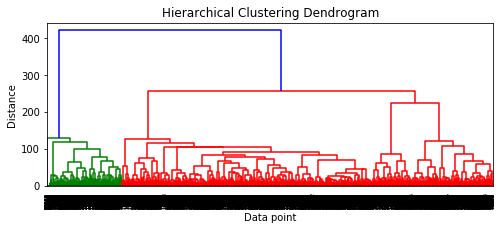

In [410]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [ ]:
#k means clustering 

# extra stuff